### MURKA Data Science Assignment

In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

import warnings

In [2]:
#Reading data into a df
data = pd.read_excel("/Users/daryarudych/Desktop/murka_data.xlsx", index_col = 0)

## Задание 1: Анализ базы пользователей игры Покер

In [3]:
#Checking data types
data.dtypes

Birth_y                   int64
Sex                      object
LifeTime                float64
LastLog_days_ago        float64
LastPayment_days_ago    float64
Sessions                  int64
Payments                  int64
Money                   float64
Level                     int64
dtype: object

In [4]:
#Exploring dataset 
data.describe(include='all')

,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level
count,6344.00000,6289,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1960.15558,NaN,277.540689,7.777248,130.425156,274.366488,9.423707,115.328695,70.641866
std,13.15187,NaN,182.446531,8.053561,130.814596,410.211650,19.127101,537.277480,119.817965
min,1905.00000,NaN,4.545576,0.548843,0.559299,1.000000,1.000000,0.990000,1.000000
25%,1952.00000,NaN,135.545576,1.548843,28.559299,48.000000,2.000000,3.980000,19.000000
50%,1960.00000,NaN,255.545576,3.548843,86.559299,141.000000,4.000000,14.980000,37.000000
75%,1969.00000,NaN,358.795576,11.548843,204.559299,340.000000,9.000000,60.872500,69.000000


### Question 1.1: Рассчитайте долю пользователей, которые совершили последний логин более 1-й недели назад

In [5]:
logs = round(data['LastLog_days_ago'][data['LastLog_days_ago']>7].count()/data['LastLog_days_ago'].count(),2)
print (f'Percent of users last logged more than 7 days ago: {logs}%')

Percent of users last logged more than 7 days ago: 0.37%


### Question 1.2: Какое среднее количество сессий у пользователей, которые установили игру более года назад?

In [6]:
avg_sessions = round(data['Sessions'][data['LifeTime']>365].mean(), 0)
print (f'The average # of sessions for users who installed the game more than a year ago is {avg_sessions}')
                    

The average # of sessions for users who installed the game more than a year ago is 427.0


### Question 1.3: Сделайте анализ игровой аудитории в зависимости от их пола и возраста.

In [7]:
# Creating age column with age of users in years
now = dt.now().year
data['Age'] = now - data['Birth_y']
data.head()

,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,Age
id,,,,,,,,,,
1,1962,female,863.545576,18.548843,841.559299,21,1,1.00,34,57
2,1972,female,498.545576,1.548843,3.559299,489,25,27.77,44,47
3,1970,male,333.545576,17.548843,333.559299,5,1,4.99,4,49
4,1962,male,148.545576,18.548843,144.559299,512,2,2.98,68,57
5,1956,male,149.545576,1.548843,102.559299,327,4,61.97,83,63


- Из статистики, приведенной ниже, мы видим, что некоторые из значений в колонке "Возраст" нереалистичны. Так, например, максимальный возраст игроков - 114 лет. Можно предположить, что многие игроки указывают неверную дату рождения. 

In [8]:
data['Age'].describe()

count    6344.00000
mean       58.84442
std        13.15187
min        19.00000
25%        50.00000
50%        59.00000
75%        67.00000
max       114.00000
Name: Age, dtype: float64

In [9]:
data.head()

,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,Age
id,,,,,,,,,,
1,1962,female,863.545576,18.548843,841.559299,21,1,1.00,34,57
2,1972,female,498.545576,1.548843,3.559299,489,25,27.77,44,47
3,1970,male,333.545576,17.548843,333.559299,5,1,4.99,4,49
4,1962,male,148.545576,18.548843,144.559299,512,2,2.98,68,57
5,1956,male,149.545576,1.548843,102.559299,327,4,61.97,83,63


In [10]:
#Grouping data by sex

#data['Sex'].describe()
aggs = {'Sex': {'User_Count': 'count'}, 'Age': {'Avg_Age': 'mean'},
        'LifeTime': {'Avg_LifeTime(days)': 'mean'},'Sessions': {'Avg_Sessions': 'mean'}, 
        'Payments': {'Total_Payments': 'sum', 'Avg_Payments': 'mean'},
        'Money':{'Total_Spent(RUB)': 'sum', 'Avg_Spent(RUB)': 'mean'},
       'Level': {'Avg_level': 'mean'}}
demographics_sex = data.groupby('Sex').agg(aggs).apply(lambda x: round(x,0))
demographics_sex.columns = demographics_sex.columns.droplevel()
demographics_sex['User_Perc'] = demographics_sex['User_Count'].apply(lambda x: round(x/sum(demographics_sex['User_Count']),1))

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [11]:
demographics_sex

,User_Count,Avg_Age,Avg_LifeTime(days),Avg_Sessions,Total_Payments,Avg_Payments,Total_Spent(RUB),Avg_Spent(RUB),Avg_level,User_Perc
Sex,,,,,,,,,,
female,2477,61.0,253.0,274.0,24950,10.0,275011.0,111.0,72.0,0.4
male,3812,58.0,294.0,275.0,34082,9.0,446284.0,117.0,70.0,0.6


Из таблицы demographics_sex мы можем сделать следующие выводы:
1. Большинство пользователей - мужчины (60%)
2. Среднее значение возраста выше среди женщин, чем мужчин
3. В среднем, мужчины тратят в игре больше, чем женщины
4. Лояльность среди мужчин-пользователей выше, чем среди женщин. Однако, в среднем, мужчины и женщины имееют почти одинаковое количество сессий за всю жизнь в игре и достигают приблизительного одинакового уровня.
5. В целом, поведение пользователей в игре (с точки зрения трат, логинов и т.д.) не имеет существенных различий по половому признаку. Возможно, компании стоит выделять больше ресурсов на маркетинг игры среди женщин, так как они тратят в игре в среднем только на 6 руб. меньше, чем мужчины. 

In [12]:
#Creating age groups
age_bins = [0, 30, 39, 49, 59, 69, 79, 114]
group_names = ["<30", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

#Categorize the existing players using the age bins:
data["Age_Group"] = pd.cut(data["Age"], age_bins, labels=group_names)

#Grouping data by age group
aggs = {'Sex': {'User_Count': 'count'}, 'Age': {'Avg_Age': 'mean'},
        'LifeTime': {'Avg_LifeTime(days)': 'mean'},'Sessions': {'Avg_Sessions': 'mean'}, 
        'Payments': {'Total_Payments': 'sum', 'Avg_Payments': 'mean'},
        'Money':{'Total_Spent(RUB)': 'sum', 'Avg_Spent(RUB)': 'mean'},
       'Level': {'Avg_level': 'mean'}}
demographics_age = data.groupby('Age_Group').agg(aggs).apply(lambda x: round(x,0))
demographics_age.columns = demographics_age.columns.droplevel()
demographics_age['User_Perc'] = demographics_age['User_Count'].apply(
    lambda x: round(x/sum(demographics_age['User_Count']),2))
demographics_age

/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,User_Count,Avg_Age,Avg_LifeTime(days),Avg_Sessions,Total_Payments,Avg_Payments,Total_Spent(RUB),Avg_Spent(RUB),Avg_level,User_Perc
Age_Group,,,,,,,,,,
<30,126,26.0,239.0,134.0,436,3.0,3926.0,31.0,78.0,0.02
30-39,298,36.0,265.0,207.0,2090,7.0,13526.0,45.0,61.0,0.05
40-49,1113,46.0,269.0,242.0,10104,9.0,131018.0,116.0,77.0,0.18
50-59,1744,55.0,267.0,263.0,15726,9.0,166011.0,94.0,75.0,0.28
60-69,1786,64.0,288.0,307.0,17632,10.0,238732.0,132.0,70.0,0.28
70-79,992,74.0,291.0,303.0,11450,11.0,149698.0,150.0,62.0,0.16
80+,230,91.0,299.0,304.0,2346,10.0,28734.0,125.0,62.0,0.04


Из таблицы demographics_age мы можем сделать следующие выводы:

1. Большинство пользователей игры люди в возрасте 50-69 лет (56%)
2. Самыми частыми пользователями игры являются люди в возрасте 60-69 лет. В этой группе среднее количество сессий составляет 307 посещений.
3. Больше всего тратят пользователи, которые находятся в возрастной группе 70-79 лет. Среди пользователей этой группы среднее количество покупок и средняя потраченная сумма за всю жизнье в игре являются самым высоким среди всех групп.
4. Наименее популярна игра среди пользователей до 30 лет (2% пользователей). Однако имея самые низкие показатели покупок, логинов и продолжительности жизни на сайте, пользователи этой группы достигают в среднем более высого уровня нежели игроки других возратсных групп.

### Question 1.4: Являются ли данные о возрасте игроков симметричными относительно среднего значения? 

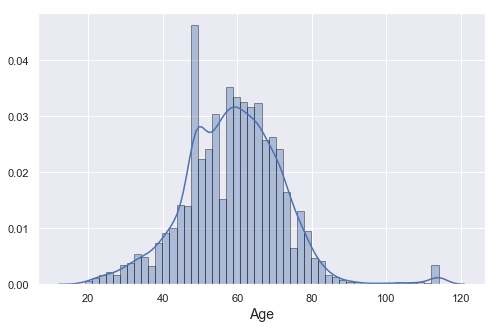

In [13]:
# Plotting distribution for age
plt.figure(figsize=(8, 5)) 
sns.set(rc={'figure.figsize':(8,5),"font.size":14,"axes.titlesize":14,"axes.labelsize":14}, color_codes=True)
sns.distplot(data['Age'], hist_kws={'edgecolor':'black'})

- Из графика дистрибуции выше видно, что данные возраста являются ассиметричными относительно среднего значения (the age distribution is skewed right)

### Question 1.5: Какие значения возраста игроков, по Вашему мнению, являются аномальными? Предложите правило отбора таких игроков.

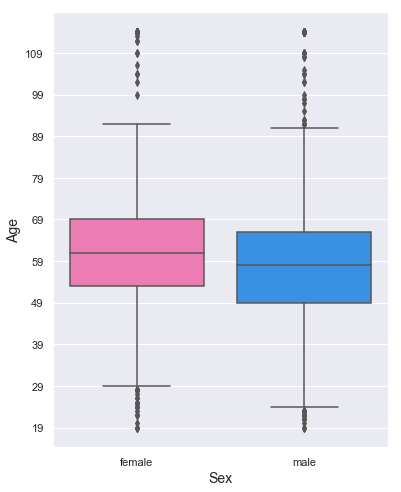

In [14]:
plt.figure(figsize=(6, 8)) 
my_pal = {"male": "dodgerblue", "female": "hotpink"}
plt.yticks(np.arange(min(data['Age']), max(data['Age'])+1, 10))
sns.boxplot(x="Sex", y="Age", data=data, palette = my_pal)

- Данная диаграмма позволяет наглядно увидеть значения возраста для каждого из полов, которые не входят в нижний и верхний квантиль и по определению являются аномальными. Также видно, что больше вариации среди значений за пределами верхнего квантиля. 
- Однако если опираться на здравый смысл и особенности игральной индустрии, можно предположить, что и некоторые значения в рамках верхнего квантиля являются аномальными, тогда как аномальные нижние значения, возможно, таковыми не являются. 
- В данной ситуации, лучше всего было бы установить произвольную нижнюю и верхнуюю границу допустимых значений, опираясь на внешние источники данных о демографии в игральной индустрии. Это позволило бы не только отсечь статистически аномальные значения возраста, но и недостоверные данные. 
- Можно также использовать один из классических статистических методов (IQR, Z-score, std). В данном случае, я бы предпочла ограничить диапазон допустимых значений до 3 стандартных отклонений, что позволит сохранить 99.7% данных. 

In [15]:
#Function to detect outliers
def detect_outliers(data):
    # calculate summary statistics
    age_mean, age_std = data.mean(), data.std()
    # identify outliers
    cut_off = age_std * 3
    lower, upper = int(round(age_mean - cut_off)), int(round(age_mean + cut_off))
    outliers = [x for x in data if x < lower or x > upper]
    print(f'The lower cut-off value is {lower}, the upper cut-off value is {upper}')

detect_outliers(data['Age'])

The lower cut-off value is 19, the upper cut-off value is 98


In [16]:
# Dropping rows with ouliers 
data = data.loc[(data['Age']>19) & (data['Age']<98), :]

#Dropping rows with nan values
data.replace(["NaN", 'NaT'], np.nan, inplace = True)
data = data.dropna()
data.head()

,Birth_y,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Payments,Money,Level,Age,Age_Group
id,,,,,,,,,,,
1,1962,female,863.545576,18.548843,841.559299,21,1,1.00,34,57,50-59
2,1972,female,498.545576,1.548843,3.559299,489,25,27.77,44,47,40-49
3,1970,male,333.545576,17.548843,333.559299,5,1,4.99,4,49,40-49
4,1962,male,148.545576,18.548843,144.559299,512,2,2.98,68,57,50-59
5,1956,male,149.545576,1.548843,102.559299,327,4,61.97,83,63,60-69


## Задание 2: Cегментация базы пользователей-плательщиков игры Покер

### Question 2.1 Какие параметры вы выберете для сегментации? Аргументируйте.

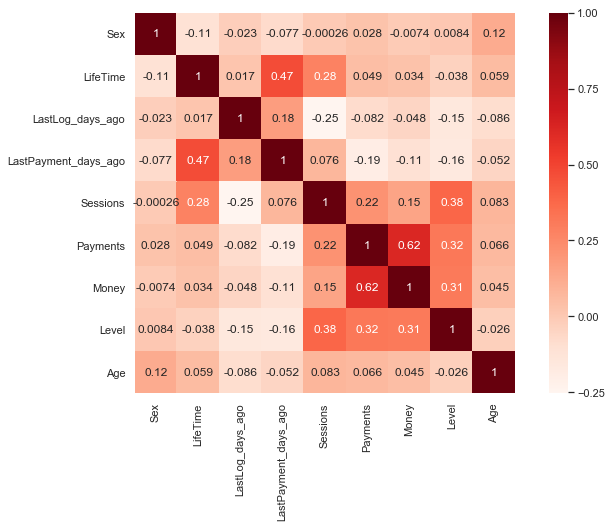

In [17]:
###Let's explore our data to see if there are any correlations between parameters

new_df = data.copy()
#Encode sex parameter 
replace_map = {'male':0, 'female': 1}
new_df['Sex'] = new_df['Sex'].replace(replace_map)

#Drop redundant columns for age data
new_df = new_df.drop(['Birth_y', 'Age_Group'], axis = 1)

#Set and plot correlation heatmap
sns.set(rc={'figure.figsize':(8,5),"font.size":12})
hmap = new_df.corr()
plt.subplots(figsize=(12,7))
sns.heatmap(hmap, vmax=1, square=True, annot=True, cmap="Reds")

warnings.filterwarnings('ignore')

- Исходя из того, что в наших данных нет предопределенных классов, мы не можем воспользоваться методоами `surpevised learning`, как например `random forest`, который позволят расчитать `feature importance` для определения значимых параметров. 
- Также наши данные не есть высоко размерными (9 параметров), что исключает необходимость использовать principal component analysis. Теоретически мы можем использовать все параметры. 
- Однако, некоторые из параметров отображают практически одну и ту же информацию и могут быть исключены. Так, например, `new_df` содержит информацию о возрасте пользователей в трех параметрах: `Birth_y, Age`, `Age_Group`. Мы можем оставить одну - `Age`.
 - Диаграмма корреляций оставшихся параметров также показывает высокую корреляцию между параметрами `Payments` & `Money`. Для сегментации пользователей целесообразнее оставить параметр `Money`, так как с точки зрения бизнеса, более важным является общая прибыль от пользователя, нежели количество транзакций.
- Таким образом, для сегментации бази пользователей мы будем использовать оставшиеся 8 параметров `LifeTime`, `Age`, `Sex`, `LastLog_days_ago`, `LastPayment_days_ago`, `Sessions`, `Level`, `Money`.

### Question 2.2: Проведите сегментацию. Определите оптимальное, по Вашему мнению, количество сегментов.

In [18]:
# Drop 'Payments' columns
new_df = new_df.drop(['Payments'], axis=1)
new_df.head()

,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Money,Level,Age
id,,,,,,,,
1,1,863.545576,18.548843,841.559299,21,1.00,34,57
2,1,498.545576,1.548843,3.559299,489,27.77,44,47
3,0,333.545576,17.548843,333.559299,5,4.99,4,49
4,0,148.545576,18.548843,144.559299,512,2.98,68,57
5,0,149.545576,1.548843,102.559299,327,61.97,83,63


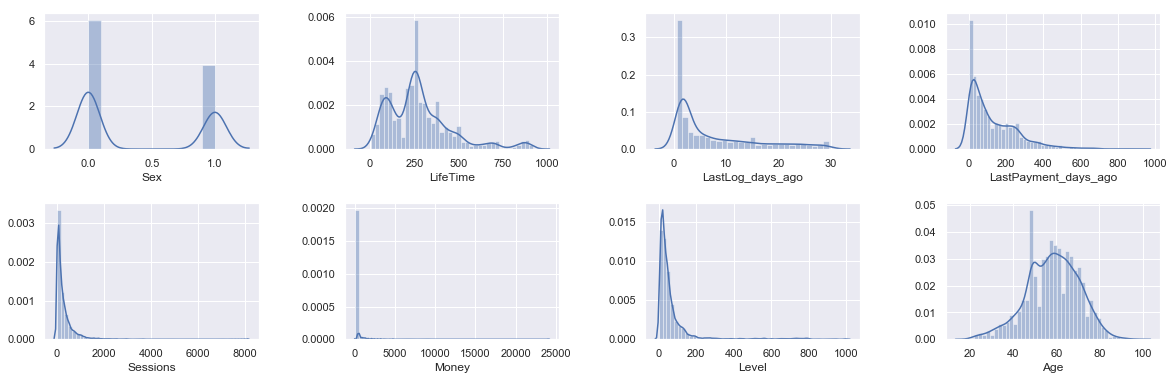

In [19]:
# We will be using K-means for clustering
# Before we implement K-means, we need to explore distribution of our variables 
# and pre-process our data accordingly

# Plot distribution of the variables
warnings.filterwarnings('ignore')
plots_tot = 8
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
x=0
while x<plots_tot:
    for ax, col in zip(axes.flatten(), new_df.columns[:]):
        sns.distplot(new_df[col], ax=ax)
        x = x+1
plt.show()


In [20]:
#Since the distributions of the variables are skewed, we transform them with log
for col in new_df.columns[1:7]:
    new_df[col] = np.log(new_df[col])
new_df.head()

,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Money,Level,Age
id,,,,,,,,
1,1,6.761047,2.920407,6.735256,3.044522,0.000000,3.526361,57
2,1,6.211695,0.437508,1.269564,6.192362,3.323956,3.784190,47
3,0,5.809780,2.864988,5.809821,1.609438,1.607436,1.386294,49
4,0,5.000892,2.920407,4.973690,6.238325,1.091923,4.219508,57
5,0,5.007601,0.437508,4.630441,5.789960,4.126650,4.418841,63


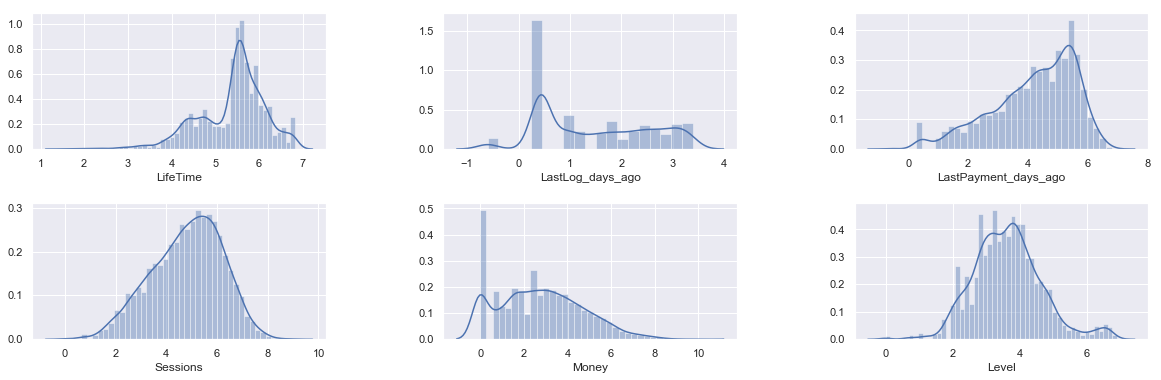

In [21]:
#Plot transformed variables
plots_tot = 6
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
x=0
while x<plots_tot:
    for ax, col in zip(axes.flatten(), new_df.columns[1:7]):
        sns.distplot(new_df[col], ax=ax)
        x = x+1
plt.show()

In [22]:
#Check means and std 
new_df.describe()

,Sex,LifeTime,LastLog_days_ago,LastPayment_days_ago,Sessions,Money,Level,Age
count,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000,6219.000000
mean,0.392828,5.386582,1.490470,4.198074,4.804953,2.792021,3.639707,58.336710
std,0.488418,0.764813,1.086621,1.387403,1.390429,1.918776,1.022285,12.056763
min,0.000000,1.514154,-0.599943,-0.581072,0.000000,-0.010050,0.000000,20.000000
25%,0.000000,4.912983,0.437508,3.351983,3.850148,1.381282,2.944439,50.000000
50%,0.000000,5.543401,1.266622,4.472316,4.948760,2.706716,3.610918,59.000000
75%,1.000000,5.884841,2.446585,5.328161,5.828946,4.108330,4.234107,67.000000
max,1.000000,6.826052,3.386045,6.805234,8.995785,10.093877,6.906755,97.000000


In [23]:
##Scale and normalize data for K-means

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(new_df)

# Scale and center the data
data_normalized = scaler.transform(new_df)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, columns=new_df.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

           Sex  LifeTime  LastLog_days_ago  LastPayment_days_ago  Sessions  \
count  6219.00   6219.00           6219.00               6219.00   6219.00   
mean     -0.00     -0.00             -0.00                 -0.00     -0.00   
std       1.00      1.00              1.00                  1.00      1.00   
min      -0.80     -5.06             -1.92                 -3.44     -3.46   
25%      -0.80     -0.62             -0.97                 -0.61     -0.69   
50%      -0.80      0.21             -0.21                  0.20      0.10   
75%       1.24      0.65              0.88                  0.81      0.74   
max       1.24      1.88              1.74                  1.88      3.01   

         Money    Level      Age  
count  6219.00  6219.00  6219.00  
mean     -0.00    -0.00    -0.00  
std       1.00     1.00     1.00  
min      -1.46    -3.56    -3.18  
25%      -0.74    -0.68    -0.69  
50%      -0.04    -0.03     0.06  
75%       0.69     0.58     0.72  
max       3.81   

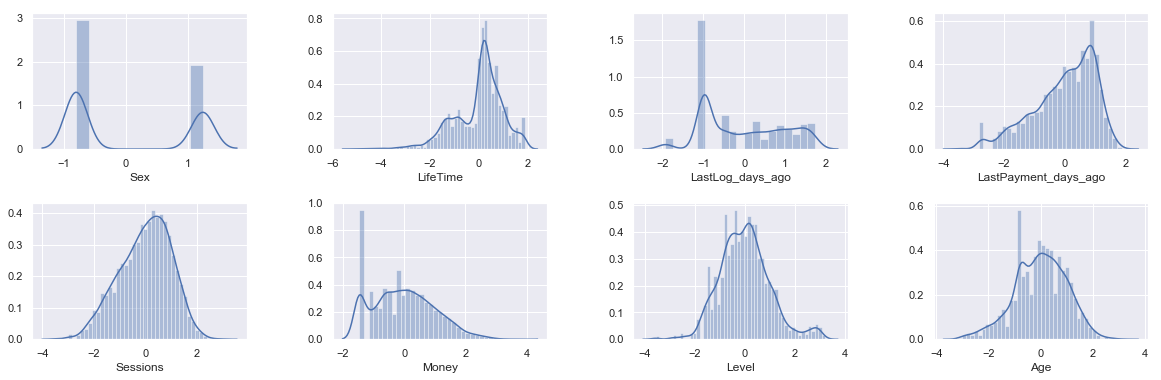

In [24]:
#Plot normalized variables
plots_tot = 8
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
x=0
while x<plots_tot:
    for ax, col in zip(axes.flatten(), data_normalized.columns[:]):
        sns.distplot(data_normalized[col], ax=ax)
        x = x+1
plt.show()

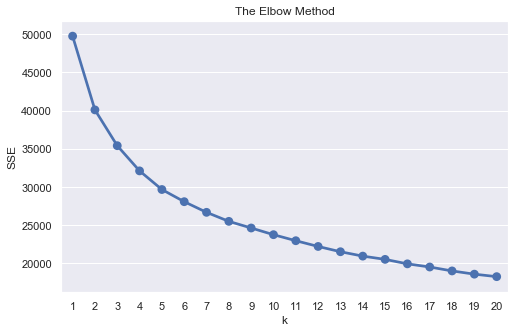

In [25]:
#Decide on the number of cluster using Elbow method
sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(data_normalized)
    sse[k]= kmeans.inertia_ #sum of squared distances to closest cluster center
plt.title("The Elbow Method")
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

Наша цель выбрать наименьше значение `k`, после которого последующее увеличение `k` не ведет к существенному уменьшению `SSE`. Из графика видно, что наиболее оптимальное количество сегментов в районе `k=5-6`.

In [26]:
#Compute k-means on preprocessed data where k = 5
kmeans = KMeans(n_clusters = 5, random_state = 1)
kmeans.fit(data_normalized)
y_kmeans = kmeans.predict(data_normalized)
cluster5_labels = kmeans.labels_

In [27]:
#Create a new df with assigned clusters
k5_df = data.assign(Cluster = cluster5_labels)

#Compute summary for each cluster
aggs2 = {'Age': {'Avg_Age': 'mean'},
        'LifeTime': {'Avg_LifeTime(days)': 'mean'},'Sessions': {'Avg_Sessions': 'mean'},
         'LastPayment_days_ago': {'Avg_LastPayment_days': 'mean'},
         'LastLog_days_ago' : {'Avg_LastLog_days': 'mean'},
        'Payments': {'Avg_Payments': 'mean'},
        'Money':{'Avg_Spent(RUB)': 'mean'},
       'Level': {'Avg_level': 'mean'}}
#Display results
k5_df.groupby(['Cluster']).agg(aggs2).round(0)


,Age,LifeTime,Sessions,LastPayment_days_ago,LastLog_days_ago,Payments,Money,Level
,Avg_Age,Avg_LifeTime(days),Avg_Sessions,Avg_LastPayment_days,Avg_LastLog_days,Avg_Payments,Avg_Spent(RUB),Avg_level
Cluster,,,,,,,,
0,59.0,359.0,452.0,176.0,4.0,6.0,40.0,52.0
1,54.0,85.0,54.0,40.0,9.0,4.0,20.0,48.0
2,56.0,354.0,68.0,233.0,15.0,3.0,22.0,17.0
3,60.0,267.0,459.0,31.0,4.0,29.0,470.0,200.0
4,62.0,283.0,318.0,142.0,6.0,7.0,50.0,47.0


In [28]:
#Compute k-means on preprocessed data where k = 6
kmeans = KMeans(n_clusters = 6, random_state = 1)
kmeans.fit(data_normalized)
y_kmeans = kmeans.predict(data_normalized)
cluster6_labels = kmeans.labels_

In [29]:
#Create a new df with assigned clusters
k6_df = data.assign(Cluster = cluster6_labels)

#Compute summary for each cluster
aggs2 = {'Age': {'Avg_Age': 'mean'},
        'LifeTime': {'Avg_LifeTime(days)': 'mean'},'Sessions': {'Avg_Sessions': 'mean'}, 
         'LastPayment_days_ago': {'Avg_LastPayment_days': 'mean'},
         'LastLog_days_ago' : {'Avg_LastLog_days': 'mean'},
        'Payments': {'Avg_Payments': 'mean'},
        'Money':{'Avg_Spent(RUB)': 'mean'},
       'Level': {'Avg_level': 'mean'}}

#Display the results
k6_df.groupby(['Cluster']).agg(aggs2).round(0)

,Age,LifeTime,Sessions,LastPayment_days_ago,LastLog_days_ago,Payments,Money,Level
,Avg_Age,Avg_LifeTime(days),Avg_Sessions,Avg_LastPayment_days,Avg_LastLog_days,Avg_Payments,Avg_Spent(RUB),Avg_level
Cluster,,,,,,,,
0,62.0,273.0,404.0,135.0,3.0,8.0,50.0,60.0
1,59.0,358.0,477.0,169.0,3.0,6.0,41.0,56.0
2,55.0,357.0,93.0,229.0,14.0,4.0,27.0,21.0
3,59.0,282.0,87.0,167.0,15.0,4.0,29.0,25.0
4,54.0,79.0,59.0,38.0,8.0,4.0,23.0,52.0
5,61.0,272.0,456.0,29.0,4.0,30.0,496.0,200.0


Мы видим, что при `k=6` кластерах разбежность между некоторыми группами менее заметна. Для простоты интерпритации, мы оставим вариант сегментации пользователей на 5 групп.

### Question 2.3-2.4: Сделайте анализ полученных сегментов (наполняемость, описательные статистики и т.д.) Какие дальнейшие стратегии работы с полученными сегментами пользователей Вы порекомендуете?

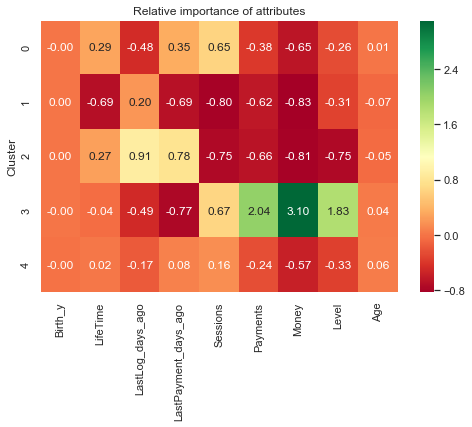

In [30]:
#Plot Relative Importance heatmap
cluster_avg = k5_df.groupby(['Cluster']).mean()
pop_avg = data.mean()
relative_imp = cluster_avg/pop_avg - 1
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp,annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()


In [31]:
k5_df.groupby(['Cluster']).agg(aggs2).round(0)

,Age,LifeTime,Sessions,LastPayment_days_ago,LastLog_days_ago,Payments,Money,Level
,Avg_Age,Avg_LifeTime(days),Avg_Sessions,Avg_LastPayment_days,Avg_LastLog_days,Avg_Payments,Avg_Spent(RUB),Avg_level
Cluster,,,,,,,,
0,59.0,359.0,452.0,176.0,4.0,6.0,40.0,52.0
1,54.0,85.0,54.0,40.0,9.0,4.0,20.0,48.0
2,56.0,354.0,68.0,233.0,15.0,3.0,22.0,17.0
3,60.0,267.0,459.0,31.0,4.0,29.0,470.0,200.0
4,62.0,283.0,318.0,142.0,6.0,7.0,50.0,47.0


Из данной диаграммы и таблицы `k5_df` можем сделать следующие выводы о сегментах:
- **Группа 0 ("Loyal Players")**: 
<br>Одни из самых частых и "старых" пользователей игры, которые по каким-то причинам перестали совершать покупки. 
<br>*Рекомендация*: Этой группе пользователей будут актуальны программы лояльности, например специальные скидки как самым старым преданным пользователям игры. 
<br>
<br>
- **Группа 1 ("Poker Newbies")**: 
<br>Самые новые пользователи, у которых самое большое кол-во дней с момента последнего логина. Возможно, это группа людей, которые еще окончательно не стали постоянными игроками и не очень заинтересованы игрой. 
<br>*Рекомендация*: Для таких пользователей будут актуальны бонусные бесплатные фишки, направленные на то, чтобы "завоевать" пользователя и мотивировать его играть и выигрывать больше.
<br>
<br>
- **Группа 2 ("Upset Players")**: 
<br>Также одни из самых "старых" пользователей, которые перестали играть в последнее время. Средний уровень в этой группе самый низкий. Это люди, которые играют редко и проигрывают.  
*Рекомендация*: У этих пользователей необходимо вернуть интерес к игре, возможно таким пользователям будут интересны предложения, которые помогут им повысить их уровень в игре.
<br>
<br>
- **Группа 3 ("Poker Masters")**: 
<br>Пользователи отличающиеся самой высокой суммой потраченных в игре денег, самым большим кол-вом транзакций, самым высоким кол-вом посещений и уровнем, достигнутым в игре.
<br>*Рекомендация*: Для таких игроков актуальными будут "сгорающие"  предложения, подталкивающие пользователя срочно совершить покупку.
<br>
<br>
- **Группа 4 ("Playing-Not-Spending")**: 
<br>Пользователи, которые довольно часто играют, но давно не совершали никаких покупок  (в среднем 142 дня назад) и имеют относительно низкий уровень. 
<br>*Рекомендация*: Для таких игроков также будут актуальны "сгорающие" скидки на платные игровые продукты, а также бонусы, которые позволяют повысить уровень.
***
- Также, можно заметить, что возвраст не является определяющим параметром ни для одной из групп.

## Задание 3: Анализ маркетинговой кампании

### Question 3.1: Постройте прогноз накопительного дохода на нового игрока для месяцев, по которым отсутвуют данные. 

In [33]:
#Reading data into a df
arpu = pd.read_excel("/Users/daryarudych/Desktop/repos/Customer-segmentation-with-K-Means/marketing_data_1.xlsx", index_col = 0)
#arpu

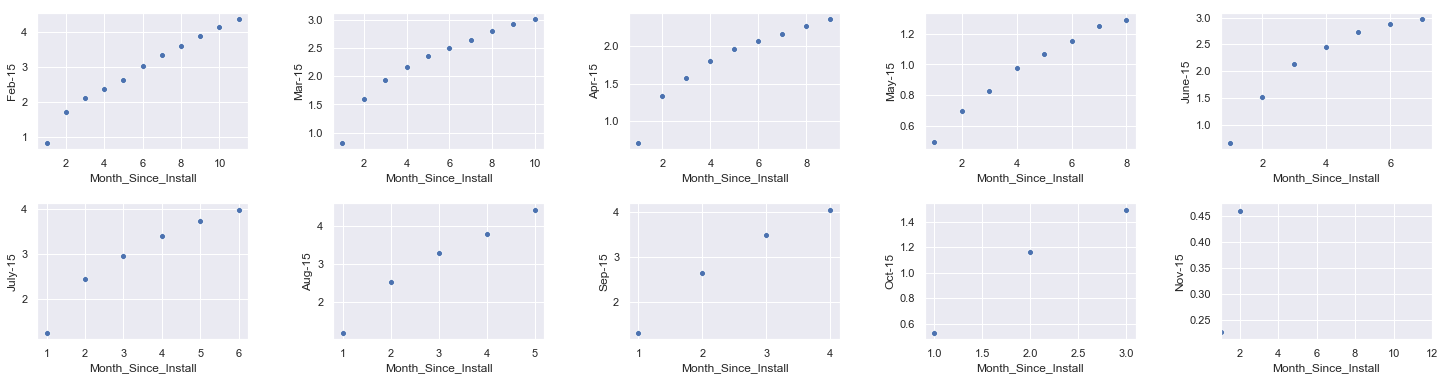

In [34]:
#Visualize each campaign
plots_tot = 10
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
x=0
while x<plots_tot:
    for ax, col in zip(axes.flatten(), arpu.columns[1:]):
        sns.scatterplot(arpu.index, arpu[col], ax=ax)
        x = x+1
plt.xlim(1,12)
plt.show()

- Данная визуализация позволяет увидеть, что накопительный доход для маркетинговых кампаний растет не совсем линейно, поэтому для прогноза накопительного дохода, мы построем две модели - линейную и полиномиальную регрессию - и сравним их точность.

In [35]:
# Read pre-processed data
train_df = pd.read_excel("/Users/daryarudych/Desktop/repos/Customer-segmentation-with-K-Means/marketing_data2.xlsx", index_col = 0)

In [36]:
#Reset index
train_df.reset_index(level=0, inplace=True)

Примечание: названию маркетинговой компании было присвоено значение накопительного дохода после 1-го месяца:



In [37]:
train_df.shape

(77, 3)

In [38]:
#Fitting Linear regression to the dataset
X=train_df[['Campaign', 'Month']]
y = train_df['ARPU']
lin = LinearRegression()
lin.fit(X, y)
score_lin = round(lin.score(X, y)*100, 2)
print(f'The accuracy of the model is: {score_lin}%')

The accuracy of the model is: 76.79%


In [39]:
#Fitting Polynomial regression to the dataset
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y)
lin_poly = LinearRegression()
lin_poly.fit(X_poly, y) 
score_poly = round(lin_poly.score(X_poly, y)*100, 2)
print(f'The accuracy of the model is: {score_poly}%')

The accuracy of the model is: 93.16%


In [40]:
#Build a function that returns predictions for a chosen months

def predict_arpu_poly(campaign, month):
    """Makes prediction for acccrued revenue based on encoded campaign value and
    month to make predictions for"""
    pred_list = [campaign, month]
    X = np.array(pred_list)
    X = X.reshape(1, -1)
    result = lin_poly.predict(poly.fit_transform(X))
    pred_list.append(round(*result, 2))
    """Returns list of campaign, month, predicted accrued revenue"""
    return pred_list

In [41]:
pred_dict = {0.83: [12], 0.82:[11, 12], 0.71:[10,11,12],
            0.49 : [9, 10, 11, 12], 0.66:[8, 9, 10, 11, 12],
            1.23:[7, 8, 9, 10, 11, 12],
            1.19: [6, 7, 8, 9, 10, 11, 12],
            1.32: [5, 6, 7, 8, 9, 10, 11, 12],
            0.53 : [4, 5, 6, 7, 8, 9, 10, 11, 12],
            0.23: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

for key in pred_dict:
    for i in pred_dict[key]:
        preds = predict_arpu_poly(key, i)
        train_df = train_df.append(pd.Series(preds, index=train_df.columns), ignore_index=True)
print(train_df.shape)    

(132, 3)


In [42]:
#Decode campaign period 

#Dict of encoded - decoded values
encodings = {0.38:'Jan-15', 0.83:'Feb-15', 0.82:'Mar-15', 0.71:'Apr-15', 
             0.49 :'May-15', 0.66:'June-15', 1.23:'July-15', 1.19:'Aug-15', 
             1.32:'Sep-15', 0.53:'Oct-15', 0.23:'Nov-15'}

#Iterate through a df and decode campaign periods
for row in train_df["Campaign"]:
    for k, v in encodings.items():
        if row == k:
            train_df['Campaign'] = train_df['Campaign'].replace(row, v)

In [43]:
#Reshape data
order = train_df["Campaign"].unique().tolist()
new_df = train_df.pivot_table(index='Campaign', columns='Month')
new_df.columns = new_df.columns.droplevel().rename(None)

In [44]:
for col in new_df.columns:
    new_col = "ARPU_" + str(round(col,))
    new_df.rename(columns={col:new_col}, inplace = True) 
new_df


,ARPU_1,ARPU_2,ARPU_3,ARPU_4,ARPU_5,ARPU_6,ARPU_7,ARPU_8,ARPU_9,ARPU_10,ARPU_11,ARPU_12
Campaign,,,,,,,,,,,,
Apr-15,0.706986,1.338351,1.575591,1.802708,1.962908,2.072889,2.167492,2.272630,2.357650,2.840000,3.220000,3.750000
Aug-15,1.191075,2.532535,3.281856,3.788665,4.421365,4.120000,4.320000,4.590000,5.030000,5.730000,6.750000,8.180000
Feb-15,0.828216,1.699295,2.101875,2.383600,2.635615,3.033870,3.358898,3.605552,3.902795,4.147337,4.368413,5.030000
Jan-15,0.379711,0.758931,0.987163,1.116264,1.204548,1.255712,1.297377,1.357756,1.437245,1.501374,1.585053,1.632136
July-15,1.232388,2.452670,2.964088,3.413956,3.732295,3.993769,4.370000,4.640000,5.090000,5.800000,6.860000,8.350000
June-15,0.660563,1.510580,2.128079,2.443016,2.724009,2.879895,2.965672,2.190000,2.310000,2.500000,2.810000,3.260000
Mar-15,0.821342,1.597377,1.936982,2.156523,2.358156,2.501514,2.641027,2.796199,2.919614,3.008919,4.180000,4.920000
May-15,0.493146,0.699365,0.830778,0.980381,1.070898,1.149581,1.249697,1.291045,1.540000,1.630000,1.770000,1.970000
Nov-15,0.226927,0.460763,0.680000,0.890000,1.100000,1.310000,1.510000,1.700000,1.870000,2.030000,2.140000,2.200000


### Question 3.2: Рассчитатайте ROI на 12-й месяц после инсталла по каждому из периодов кампании.

In [45]:
#Read data in a df
mc_cost = pd.read_excel("/Users/daryarudych/Desktop/repos/Customer-segmentation-with-K-Means/mc_cost.xlsx", 
                        index_col = 0)
mc_cost.columns

Index(['Fixed_Campaign_Cost', 'Accrued_Revenue', 'New_Players',
       'Cost_per_player', 'Accrued_Revenue_PerPlayer'],
      dtype='object')

In [50]:
#Merge prediction df with main df
cost_df = pd.merge(mc_cost, new_df, how = 'inner', left_on = mc_cost.index, 
                   right_on = new_df.index).rename(columns = {'key_0' :'Campaign'})
cost_df

,Campaign,Fixed_Campaign_Cost,Accrued_Revenue,New_Players,Cost_per_player,Accrued_Revenue_PerPlayer,ARPU_1,ARPU_2,ARPU_3,ARPU_4,ARPU_5,ARPU_6,ARPU_7,ARPU_8,ARPU_9,ARPU_10,ARPU_11,ARPU_12
0,Jan-15,20993,45974,28168,0.745278,1.632136,0.379711,0.758931,0.987163,1.116264,1.204548,1.255712,1.297377,1.357756,1.437245,1.501374,1.585053,1.632136
1,Feb-15,47079,116475,26663,1.765705,4.368413,0.828216,1.699295,2.101875,2.383600,2.635615,3.033870,3.358898,3.605552,3.902795,4.147337,4.368413,5.030000
2,Mar-15,144109,127178,42267,3.409492,3.008919,0.821342,1.597377,1.936982,2.156523,2.358156,2.501514,2.641027,2.796199,2.919614,3.008919,4.180000,4.920000
3,Apr-15,125072,73330,31103,4.021220,2.357650,0.706986,1.338351,1.575591,1.802708,1.962908,2.072889,2.167492,2.272630,2.357650,2.840000,3.220000,3.750000
4,May-15,81831,53457,41406,1.976308,1.291045,0.493146,0.699365,0.830778,0.980381,1.070898,1.149581,1.249697,1.291045,1.540000,1.630000,1.770000,1.970000
5,June-15,17168,19870,6700,2.562388,2.965672,0.660563,1.510580,2.128079,2.443016,2.724009,2.879895,2.965672,2.190000,2.310000,2.500000,2.810000,3.260000
6,July-15,28940,26922,6741,4.293132,3.993769,1.232388,2.452670,2.964088,3.413956,3.732295,3.993769,4.370000,4.640000,5.090000,5.800000,6.860000,8.350000
7,Aug-15,48653,54343,12291,3.958425,4.421365,1.191075,2.532535,3.281856,3.788665,4.421365,4.120000,4.320000,4.590000,5.030000,5.730000,6.750000,8.180000
8,Sep-15,55696,50020,12371,4.502142,4.043327,1.318652,2.642865,3.481839,4.043327,4.120000,4.250000,4.390000,4.620000,5.060000,5.790000,6.920000,8.520000
9,Oct-15,38681,19153,12823,3.016533,1.493644,0.530558,1.161015,1.493644,1.440000,1.520000,1.570000,1.590000,1.620000,1.680000,1.780000,1.950000,2.200000


In [51]:
#Builf function for ROI for 12th month
def calculate_romi_12(campaign):
    idx = cost_df[cost_df['Campaign']==campaign].index.values.astype(int)
    arpu_12 = cost_df['ARPU_12'][idx]
    cpi = cost_df['Cost_per_player'][idx]
    romi_12 = (arpu_12/cpi)*100
    return float(romi_12)

In [52]:
#Append calculated ROI to a df
roi_list = []
for campaign in cost_df['Campaign'].values:
    roi_list.append(round(calculate_romi_12(campaign),2))


In [53]:
#Append a list of roi to a corresponding column in a df
se = pd.Series(roi_list)
cost_df['ROI_12, %'] = se.values
cost_df

,Campaign,Fixed_Campaign_Cost,Accrued_Revenue,New_Players,Cost_per_player,Accrued_Revenue_PerPlayer,ARPU_1,ARPU_2,ARPU_3,ARPU_4,ARPU_5,ARPU_6,ARPU_7,ARPU_8,ARPU_9,ARPU_10,ARPU_11,ARPU_12,"ROI_12, %"
0,Jan-15,20993,45974,28168,0.745278,1.632136,0.379711,0.758931,0.987163,1.116264,1.204548,1.255712,1.297377,1.357756,1.437245,1.501374,1.585053,1.632136,219.00
1,Feb-15,47079,116475,26663,1.765705,4.368413,0.828216,1.699295,2.101875,2.383600,2.635615,3.033870,3.358898,3.605552,3.902795,4.147337,4.368413,5.030000,284.87
2,Mar-15,144109,127178,42267,3.409492,3.008919,0.821342,1.597377,1.936982,2.156523,2.358156,2.501514,2.641027,2.796199,2.919614,3.008919,4.180000,4.920000,144.30
3,Apr-15,125072,73330,31103,4.021220,2.357650,0.706986,1.338351,1.575591,1.802708,1.962908,2.072889,2.167492,2.272630,2.357650,2.840000,3.220000,3.750000,93.26
4,May-15,81831,53457,41406,1.976308,1.291045,0.493146,0.699365,0.830778,0.980381,1.070898,1.149581,1.249697,1.291045,1.540000,1.630000,1.770000,1.970000,99.68
5,June-15,17168,19870,6700,2.562388,2.965672,0.660563,1.510580,2.128079,2.443016,2.724009,2.879895,2.965672,2.190000,2.310000,2.500000,2.810000,3.260000,127.23
6,July-15,28940,26922,6741,4.293132,3.993769,1.232388,2.452670,2.964088,3.413956,3.732295,3.993769,4.370000,4.640000,5.090000,5.800000,6.860000,8.350000,194.50
7,Aug-15,48653,54343,12291,3.958425,4.421365,1.191075,2.532535,3.281856,3.788665,4.421365,4.120000,4.320000,4.590000,5.030000,5.730000,6.750000,8.180000,206.65
8,Sep-15,55696,50020,12371,4.502142,4.043327,1.318652,2.642865,3.481839,4.043327,4.120000,4.250000,4.390000,4.620000,5.060000,5.790000,6.920000,8.520000,189.24
9,Oct-15,38681,19153,12823,3.016533,1.493644,0.530558,1.161015,1.493644,1.440000,1.520000,1.570000,1.590000,1.620000,1.680000,1.780000,1.950000,2.200000,72.93


### Question 3.3: Сделайте краткие выводы об эффективности кампании.

In [54]:
cost_df.loc[:, ['Campaign', 'Fixed_Campaign_Cost', 'Cost_per_player','New_Players', 
                'Accrued_Revenue','ROI_12, %', 'Accrued_Revenue_PerPlayer', 'ARPU_12']].sort_values(['Accrued_Revenue_PerPlayer', 
                                                                                                     'ARPU_12','ROI_12, %'], ascending = False)

,Campaign,Fixed_Campaign_Cost,Cost_per_player,New_Players,Accrued_Revenue,"ROI_12, %",Accrued_Revenue_PerPlayer,ARPU_12
7,Aug-15,48653,3.958425,12291,54343,206.65,4.421365,8.180000
1,Feb-15,47079,1.765705,26663,116475,284.87,4.368413,5.030000
8,Sep-15,55696,4.502142,12371,50020,189.24,4.043327,8.520000
6,July-15,28940,4.293132,6741,26922,194.50,3.993769,8.350000
2,Mar-15,144109,3.409492,42267,127178,144.30,3.008919,4.920000
5,June-15,17168,2.562388,6700,19870,127.23,2.965672,3.260000
3,Apr-15,125072,4.021220,31103,73330,93.26,2.357650,3.750000
0,Jan-15,20993,0.745278,28168,45974,219.00,1.632136,1.632136
9,Oct-15,38681,3.016533,12823,19153,72.93,1.493644,2.200000
4,May-15,81831,1.976308,41406,53457,99.68,1.291045,1.970000


**Наблюдения**
1. Кампания проводившаяся в феврале - самая эффективная с точки зрения быстроты окупаемости и доходности.
2. Кампания проводившаяся в марте сгенерировала самый большой доход за счет привлечения наибольшого числа платящиx пользователей, однако прибыль от одного пользователя меньше затрат на его привлечение, что означает это кампания требует больше времени, чтобы окупиться. 
3. Кампания проводившиеся в августе привлекли наиболее лояльный и/или доходный тип пользователей. Среди пользователей этой кагорты самый высокий показатель накопительного дохода на пользователя.
4. Январская кампания также одна из самых быстро-окупаемых за счет низкой стоимости привлечения пользователя, но доход от этой компании один из самых низких.
5. Сентябрьская кампания наиболее выгодна с точки зрения LTV пользователя. Динамика роста ARPU самая высокая среди всех кампаний.

В целом, исходя из имеющихся данных августовская кампания - самая эффективная. За ней следуют февральская и сентябрьская. Также стоит отметить, что только 3 кампании из 11 не окупились в течении года, поэтому общий результат маркетинговых кампаний - позитивный.

### Question 3.4: Смоделируйте, какая может быть максимальная стоимость привлечения на одного игрока, чтобы обеспечить окупаемость кампании за 12 месяцев.

Максимально допустимая стоимость привлечения одного игрока (САС) = ожидаемый доход от привлеченного игрока на 12-ый месяц.
`max_cpi[campaign] = ARPU_12[campaign]`